# Batch Process AIA Frames

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sunpy.map import Map
from astropy.utils.console import ProgressBar
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib.colors

import synthesizAR
from synthesizAR.instruments import InstrumentSDOAIA

%matplotlib inline

In [2]:
def make_aia_frame(obs_time,root_dir,aia_instr,save_dir=None,submap=None,vmin=1,vmax=5e4,save_options=None):
    obs_time_index = np.where(aia_instr.observing_time==obs_time)[0][0]
    fig = plt.figure(figsize=(15,10))
    plt.subplots_adjust(wspace=0.,hspace=0.,top=0.95)
    for i,chan in enumerate(aia_instr.channels):
        tmp = Map(os.path.join(root_dir, 'SDO_AIA/{}/map_t{:06d}.fits'.format(chan['name'],obs_time_index)))
        if submap:
            tmp = tmp.submap(*submap)
        ax = fig.add_subplot(2,3,i+1,projection=tmp)
        tmp.plot(annotate=False, norm=matplotlib.colors.SymLogNorm(1e-3,vmin=vmin,vmax=vmax))
        ax.coords[0].grid(alpha=0)
        ax.coords[1].grid(alpha=0)
        ax.coords[0].set_ticks_visible(False)
        ax.coords[1].set_ticks_visible(False)
        if i%3==0:
            ax.set_ylabel(r'solar-y [arcsec]',fontsize=14)
        else:
            ax.coords[1].set_ticklabel_visible(False)
        if i>2:
            ax.set_xlabel(r'solar-x [arcsec]',fontsize=14)
        else:
            ax.coords[0].set_ticklabel_visible(False)
        xtext,ytext = tmp.data_to_pixel(-230*u.arcsec,-130*u.arcsec)
        ax.text(xtext.value,ytext.value,
                r'${}$ $\mathrm{{\mathring{{A}}}}$'.format(chan['name']),
                color='w',fontsize=16)
    fig.suptitle(r'$t={:.0f}$ s'.format(obs_time.value),fontsize=14)
    if save_dir:
        if not save_options: save_options = {'bbox_inches':'tight'}
        if 'format' not in save_options: save_options['format'] = 'png'
        fig.savefig(os.path.join(save_dir,'all_channels_map_t{:06d}.{}'.format(obs_time_index,save_options['format'])),
                    **save_options)
        fig.clf()

## Cooling

## Nanoflares

In [3]:
aia = InstrumentSDOAIA([0,30000]*u.s)

In [ ]:
with ProgressBar(len(aia.observing_time[1000:2000]),ipython_widget=True) as progress:
    for t in aia.observing_time[1000:2000]:
        make_aia_frame(t,'/storage-home/w/wtb2/data/noaa1158_high_frequency',aia,
                       save_dir='/storage-home/w/wtb2/data/noaa1158_high_frequency/figures/SDO_AIA/')
        progress.update()

In [ ]:
with ProgressBar(len(aia.observing_time[1000:2000]),ipython_widget=True) as progress:
    for t in aia.observing_time[1000:2000]:
        make_aia_frame(t,'/storage-home/w/wtb2/data/noaa1158_intermediate_frequency/',aia,
                       save_dir='/storage-home/w/wtb2/data/noaa1158_intermediate_frequency/figures/SDO_AIA/')
        progress.update()

In [ ]:
with ProgressBar(len(aia.observing_time[1000:2000]),ipython_widget=True) as progress:
    for t in aia.observing_time[1000:2000]:
        make_aia_frame(t,'/storage-home/w/wtb2/data/noaa1158_low_frequency',aia,
                       save_dir='/storage-home/w/wtb2/data/noaa1158_low_frequency/figures/SDO_AIA/')
        progress.update()

## Powerlaw

In [4]:
with ProgressBar(len(aia.observing_time[1000:2000]),ipython_widget=True) as progress:
    for t in aia.observing_time[1000:2000]:
        make_aia_frame(t,'/storage-home/w/wtb2/data/noaa1158_power_law/',aia,
                       save_dir='/storage-home/w/wtb2/data/noaa1158_power_law/figures/SDO_AIA/')
        progress.update()

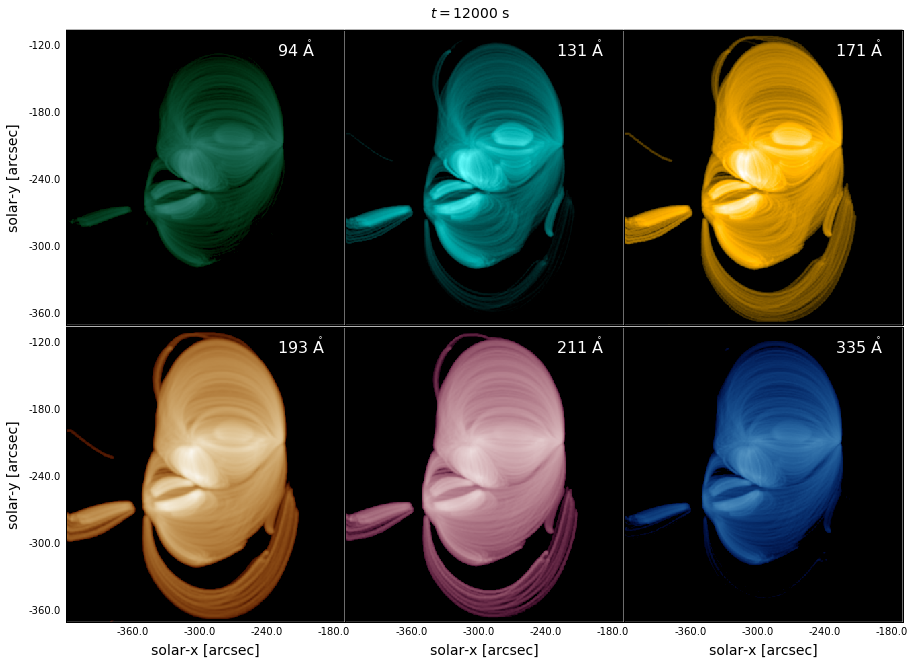

In [12]:
make_aia_frame(aia.observing_time[1200],'/storage-home/w/wtb2/data/noaa1158_power_law/',aia,
               vmin=0.01,vmax=2e3)